In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, classification_report, precision_score, recall_score, roc_auc_score, auc
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import statsmodels.api as sm
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn import linear_model
from sklearn import metrics
from statsmodels.tools import eval_measures
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from wordcloud import WordCloud
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [2]:
spotify_dataset = pd.read_csv (r"C:\Users\Matías\Documents\DH\SPOTIFY\spotify_dataset.csv")

In [3]:
spotify_dataset.head()

,Index,Highest Charting Position,Number of Times Charted,Week of Highest Charting,Song Name,Streams,Artist,Artist Followers,Song ID,Genre,...,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Chord
0,1,1,8,2021-07-23--2021-07-30,Beggin',"48,633,449",Måneskin,3377762,3Wrjm47oTz2sjIgck11l5e,"['indie rock italiano', 'italian pop']",...,0.714,0.8,-4.808,0.0504,0.127,0.359,134.002,211560,0.589,B
1,2,2,3,2021-07-23--2021-07-30,STAY (with Justin Bieber),"47,248,719",The Kid LAROI,2230022,5HCyWlXZPP0y6Gqq8TgA20,['australian hip hop'],...,0.591,0.764,-5.484,0.0483,0.0383,0.103,169.928,141806,0.478,C#/Db
2,3,1,11,2021-06-25--2021-07-02,good 4 u,"40,162,559",Olivia Rodrigo,6266514,4ZtFanR9U6ndgddUvNcjcG,['pop'],...,0.563,0.664,-5.044,0.154,0.335,0.0849,166.928,178147,0.688,A
3,4,3,5,2021-07-02--2021-07-09,Bad Habits,"37,799,456",Ed Sheeran,83293380,6PQ88X9TkUIAUIZJHW2upE,"['pop', 'uk pop']",...,0.808,0.897,-3.712,0.0348,0.0469,0.364,126.026,231041,0.591,B
4,5,5,1,2021-07-23--2021-07-30,INDUSTRY BABY (feat. Jack Harlow),"33,948,454",Lil Nas X,5473565,27NovPIUIRrOZoCHxABJwK,"['lgbtq+ hip hop', 'pop rap']",...,0.736,0.704,-7.409,0.0615,0.0203,0.0501,149.995,212000,0.894,D#/Eb


In [4]:
print("Cantidad de filas: " + str(spotify_dataset.shape[0]))
print("Cantidad de columnas: " + str(spotify_dataset.shape[1]))
print("-------------------------------\n")
print("Cantidad de valores nulos:\n")
print(spotify_dataset.isnull().sum())
print("-------------------------------\n")
print("Tipos de datos:\n")
spotify_dataset.dtypes

Cantidad de filas: 1556
Cantidad de columnas: 23
-------------------------------

Cantidad de valores nulos:

Index                        0
Highest Charting Position    0
Number of Times Charted      0
Week of Highest Charting     0
Song Name                    0
Streams                      0
Artist                       0
Artist Followers             0
Song ID                      0
Genre                        0
Release Date                 0
Weeks Charted                0
Popularity                   0
Danceability                 0
Energy                       0
Loudness                     0
Speechiness                  0
Acousticness                 0
Liveness                     0
Tempo                        0
Duration (ms)                0
Valence                      0
Chord                        0
dtype: int64
-------------------------------

Tipos de datos:



Index                         int64
Highest Charting Position     int64
Number of Times Charted       int64
Week of Highest Charting     object
Song Name                    object
Streams                      object
Artist                       object
Artist Followers             object
Song ID                      object
Genre                        object
Release Date                 object
Weeks Charted                object
Popularity                   object
Danceability                 object
Energy                       object
Loudness                     object
Speechiness                  object
Acousticness                 object
Liveness                     object
Tempo                        object
Duration (ms)                object
Valence                      object
Chord                        object
dtype: object

In [5]:
spotify_dataset.isnull().sum()

Index                        0
Highest Charting Position    0
Number of Times Charted      0
Week of Highest Charting     0
Song Name                    0
Streams                      0
Artist                       0
Artist Followers             0
Song ID                      0
Genre                        0
Release Date                 0
Weeks Charted                0
Popularity                   0
Danceability                 0
Energy                       0
Loudness                     0
Speechiness                  0
Acousticness                 0
Liveness                     0
Tempo                        0
Duration (ms)                0
Valence                      0
Chord                        0
dtype: int64

In [6]:
#Check duplicated rows
duplicado = spotify_dataset.duplicated()
print(duplicado.any())
print(spotify_dataset[duplicado])
print(spotify_dataset.shape)
spotify_dataset.drop_duplicates(inplace=True)
print(spotify_dataset.shape)

False
Empty DataFrame
Columns: [Index, Highest Charting Position, Number of Times Charted, Week of Highest Charting, Song Name, Streams, Artist, Artist Followers, Song ID, Genre, Release Date, Weeks Charted, Popularity, Danceability, Energy, Loudness, Speechiness, Acousticness, Liveness, Tempo, Duration (ms), Valence, Chord]
Index: []

[0 rows x 23 columns]
(1556, 23)
(1556, 23)


In [7]:
# Converting object columns to relevant float/int
object_cols = ['Danceability','Energy','Loudness','Speechiness','Acousticness','Liveness','Tempo','Valence','Artist Followers','Popularity','Duration (ms)']
for each_col in object_cols:
    spotify_dataset[each_col] = pd.to_numeric(spotify_dataset[each_col], errors='coerce')
spotify_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1556 entries, 0 to 1555
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Index                      1556 non-null   int64  
 1   Highest Charting Position  1556 non-null   int64  
 2   Number of Times Charted    1556 non-null   int64  
 3   Week of Highest Charting   1556 non-null   object 
 4   Song Name                  1556 non-null   object 
 5   Streams                    1556 non-null   object 
 6   Artist                     1556 non-null   object 
 7   Artist Followers           1545 non-null   float64
 8   Song ID                    1556 non-null   object 
 9   Genre                      1556 non-null   object 
 10  Release Date               1556 non-null   object 
 11  Weeks Charted              1556 non-null   object 
 12  Popularity                 1545 non-null   float64
 13  Danceability               1545 non-null   float

In [8]:
Streams_clean = spotify_dataset.Streams.replace(',','', regex=True).values
Streams_clean

array(['48633449', '47248719', '40162559', ..., '4620876', '4607385',
       '4595450'], dtype=object)

In [9]:
spotify_dataset['Streams'] = Streams_clean.reshape(-1,1)
spotify_dataset.head()

,Index,Highest Charting Position,Number of Times Charted,Week of Highest Charting,Song Name,Streams,Artist,Artist Followers,Song ID,Genre,...,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Chord
0,1,1,8,2021-07-23--2021-07-30,Beggin',48633449,Måneskin,3377762.0,3Wrjm47oTz2sjIgck11l5e,"['indie rock italiano', 'italian pop']",...,0.714,0.800,-4.808,0.0504,0.1270,0.3590,134.002,211560.0,0.589,B
1,2,2,3,2021-07-23--2021-07-30,STAY (with Justin Bieber),47248719,The Kid LAROI,2230022.0,5HCyWlXZPP0y6Gqq8TgA20,['australian hip hop'],...,0.591,0.764,-5.484,0.0483,0.0383,0.1030,169.928,141806.0,0.478,C#/Db
2,3,1,11,2021-06-25--2021-07-02,good 4 u,40162559,Olivia Rodrigo,6266514.0,4ZtFanR9U6ndgddUvNcjcG,['pop'],...,0.563,0.664,-5.044,0.1540,0.3350,0.0849,166.928,178147.0,0.688,A
3,4,3,5,2021-07-02--2021-07-09,Bad Habits,37799456,Ed Sheeran,83293380.0,6PQ88X9TkUIAUIZJHW2upE,"['pop', 'uk pop']",...,0.808,0.897,-3.712,0.0348,0.0469,0.3640,126.026,231041.0,0.591,B
4,5,5,1,2021-07-23--2021-07-30,INDUSTRY BABY (feat. Jack Harlow),33948454,Lil Nas X,5473565.0,27NovPIUIRrOZoCHxABJwK,"['lgbtq+ hip hop', 'pop rap']",...,0.736,0.704,-7.409,0.0615,0.0203,0.0501,149.995,212000.0,0.894,D#/Eb


In [10]:
spotify_dataset['Streams'] = spotify_dataset['Streams'].astype(str).astype(float)
spotify_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1556 entries, 0 to 1555
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Index                      1556 non-null   int64  
 1   Highest Charting Position  1556 non-null   int64  
 2   Number of Times Charted    1556 non-null   int64  
 3   Week of Highest Charting   1556 non-null   object 
 4   Song Name                  1556 non-null   object 
 5   Streams                    1556 non-null   float64
 6   Artist                     1556 non-null   object 
 7   Artist Followers           1545 non-null   float64
 8   Song ID                    1556 non-null   object 
 9   Genre                      1556 non-null   object 
 10  Release Date               1556 non-null   object 
 11  Weeks Charted              1556 non-null   object 
 12  Popularity                 1545 non-null   float64
 13  Danceability               1545 non-null   float

In [11]:
spotify_dataset = spotify_dataset.rename(columns={'Highest Charting Position':'Highest_Charting_Position',
                                                  'Number of Times Charted':'Number_of_Times_Charted',
                                                  'Week of Highest Charting':'Week_of_Highest_Charting',
                                                  'Song_Name':'Song_Name',
                                                  'Artist Followers':'Artist_Followers',
                                                  'Release Date':'Release_Date',
                                                  'Weeks Charted':'Weeks_Charted',
                                                  'Duration (ms)': 'Duration_ms'})
spotify_dataset.columns

Index(['Index', 'Highest_Charting_Position', 'Number_of_Times_Charted',
       'Week_of_Highest_Charting', 'Song Name', 'Streams', 'Artist',
       'Artist_Followers', 'Song ID', 'Genre', 'Release_Date', 'Weeks_Charted',
       'Popularity', 'Danceability', 'Energy', 'Loudness', 'Speechiness',
       'Acousticness', 'Liveness', 'Tempo', 'Duration_ms', 'Valence', 'Chord'],
      dtype='object')

In [12]:
#Replacing Duration Miliseconds with seconds so they are on a more standard range
spotify_dataset['Duration_s'] = spotify_dataset['Duration_ms']/1000
spotify_dataset

,Index,Highest_Charting_Position,Number_of_Times_Charted,Week_of_Highest_Charting,Song Name,Streams,Artist,Artist_Followers,Song ID,Genre,...,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration_ms,Valence,Chord,Duration_s
0,1,1,8,2021-07-23--2021-07-30,Beggin',48633449.0,Måneskin,3377762.0,3Wrjm47oTz2sjIgck11l5e,"['indie rock italiano', 'italian pop']",...,0.800,-4.808,0.0504,0.12700,0.3590,134.002,211560.0,0.589,B,211.560
1,2,2,3,2021-07-23--2021-07-30,STAY (with Justin Bieber),47248719.0,The Kid LAROI,2230022.0,5HCyWlXZPP0y6Gqq8TgA20,['australian hip hop'],...,0.764,-5.484,0.0483,0.03830,0.1030,169.928,141806.0,0.478,C#/Db,141.806
2,3,1,11,2021-06-25--2021-07-02,good 4 u,40162559.0,Olivia Rodrigo,6266514.0,4ZtFanR9U6ndgddUvNcjcG,['pop'],...,0.664,-5.044,0.1540,0.33500,0.0849,166.928,178147.0,0.688,A,178.147
3,4,3,5,2021-07-02--2021-07-09,Bad Habits,37799456.0,Ed Sheeran,83293380.0,6PQ88X9TkUIAUIZJHW2upE,"['pop', 'uk pop']",...,0.897,-3.712,0.0348,0.04690,0.3640,126.026,231041.0,0.591,B,231.041
4,5,5,1,2021-07-23--2021-07-30,INDUSTRY BABY (feat. Jack Harlow),33948454.0,Lil Nas X,5473565.0,27NovPIUIRrOZoCHxABJwK,"['lgbtq+ hip hop', 'pop rap']",...,0.704,-7.409,0.0615,0.02030,0.0501,149.995,212000.0,0.894,D#/Eb,212.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1551,1552,195,1,2019-12-27--2020-01-03,New Rules,4630675.0,Dua Lipa,27167675.0,2ekn2ttSfGqwhhate0LSR0,"['dance pop', 'pop', 'uk pop']",...,0.700,-6.021,0.0694,0.00261,0.1530,116.073,209320.0,0.608,A,209.320
1552,1553,196,1,2019-12-27--2020-01-03,Cheirosa - Ao Vivo,4623030.0,Jorge & Mateus,15019109.0,2PWjKmjyTZeDpmOUa3a5da,"['sertanejo', 'sertanejo universitario']",...,0.870,-3.123,0.0851,0.24000,0.3330,152.370,181930.0,0.714,B,181.930
1553,1554,197,1,2019-12-27--2020-01-03,Havana (feat. Young Thug),4620876.0,Camila Cabello,22698747.0,1rfofaqEpACxVEHIZBJe6W,"['dance pop', 'electropop', 'pop', 'post-teen ...",...,0.523,-4.333,0.0300,0.18400,0.1320,104.988,217307.0,0.394,D,217.307
1554,1555,198,1,2019-12-27--2020-01-03,Surtada - Remix Brega Funk,4607385.0,"Dadá Boladão, Tati Zaqui, OIK",208630.0,5F8ffc8KWKNawllr5WsW0r,"['brega funk', 'funk carioca']",...,0.550,-7.026,0.0587,0.24900,0.1820,154.064,152784.0,0.881,F,152.784


In [13]:
spotify_dataset.head()

,Index,Highest_Charting_Position,Number_of_Times_Charted,Week_of_Highest_Charting,Song Name,Streams,Artist,Artist_Followers,Song ID,Genre,...,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration_ms,Valence,Chord,Duration_s
0,1,1,8,2021-07-23--2021-07-30,Beggin',48633449.0,Måneskin,3377762.0,3Wrjm47oTz2sjIgck11l5e,"['indie rock italiano', 'italian pop']",...,0.800,-4.808,0.0504,0.1270,0.3590,134.002,211560.0,0.589,B,211.560
1,2,2,3,2021-07-23--2021-07-30,STAY (with Justin Bieber),47248719.0,The Kid LAROI,2230022.0,5HCyWlXZPP0y6Gqq8TgA20,['australian hip hop'],...,0.764,-5.484,0.0483,0.0383,0.1030,169.928,141806.0,0.478,C#/Db,141.806
2,3,1,11,2021-06-25--2021-07-02,good 4 u,40162559.0,Olivia Rodrigo,6266514.0,4ZtFanR9U6ndgddUvNcjcG,['pop'],...,0.664,-5.044,0.1540,0.3350,0.0849,166.928,178147.0,0.688,A,178.147
3,4,3,5,2021-07-02--2021-07-09,Bad Habits,37799456.0,Ed Sheeran,83293380.0,6PQ88X9TkUIAUIZJHW2upE,"['pop', 'uk pop']",...,0.897,-3.712,0.0348,0.0469,0.3640,126.026,231041.0,0.591,B,231.041
4,5,5,1,2021-07-23--2021-07-30,INDUSTRY BABY (feat. Jack Harlow),33948454.0,Lil Nas X,5473565.0,27NovPIUIRrOZoCHxABJwK,"['lgbtq+ hip hop', 'pop rap']",...,0.704,-7.409,0.0615,0.0203,0.0501,149.995,212000.0,0.894,D#/Eb,212.000


In [14]:
spotify_dataset.describe()

,Index,Highest_Charting_Position,Number_of_Times_Charted,Streams,Artist_Followers,Popularity,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration_ms,Valence,Duration_s
count,1556.000000,1556.000000,1556.000000,1.556000e+03,1.545000e+03,1545.000000,1545.000000,1545.000000,1545.000000,1545.000000,1545.000000,1545.000000,1545.000000,1545.000000,1545.000000,1545.000000
mean,778.500000,87.744216,10.668380,6.340219e+06,1.471690e+07,70.089320,0.689997,0.633495,-6.348474,0.123656,0.248695,0.181202,122.811023,197940.816828,0.514704,197.940817
std,449.322824,58.147225,16.360546,3.369479e+06,1.667579e+07,15.824034,0.142444,0.161577,2.509281,0.110383,0.250326,0.144071,29.591088,47148.930420,0.227326,47.148930
min,1.000000,1.000000,1.000000,4.176083e+06,4.883000e+03,0.000000,0.150000,0.054000,-25.166000,0.023200,0.000025,0.019700,46.718000,30133.000000,0.032000,30.133000
25%,389.750000,37.000000,1.000000,4.915322e+06,2.123734e+06,65.000000,0.599000,0.532000,-7.491000,0.045600,0.048500,0.096600,97.960000,169266.000000,0.343000,169.266000
50%,778.500000,80.000000,4.000000,5.275748e+06,6.852509e+06,73.000000,0.707000,0.642000,-5.990000,0.076500,0.161000,0.124000,122.012000,193591.000000,0.512000,193.591000
75%,1167.250000,137.000000,12.000000,6.455044e+06,2.269875e+07,80.000000,0.796000,0.752000,-4.711000,0.165000,0.388000,0.217000,143.860000,218902.000000,0.691000,218.902000
max,1556.000000,200.000000,142.000000,4.863345e+07,8.333778e+07,100.000000,0.980000,0.970000,1.509000,0.884000,0.994000,0.962000,205.272000,588139.000000,0.979000,588.139000


In [15]:
spotify_dataset.isna().sum()

Index                         0
Highest_Charting_Position     0
Number_of_Times_Charted       0
Week_of_Highest_Charting      0
Song Name                     0
Streams                       0
Artist                        0
Artist_Followers             11
Song ID                       0
Genre                         0
Release_Date                  0
Weeks_Charted                 0
Popularity                   11
Danceability                 11
Energy                       11
Loudness                     11
Speechiness                  11
Acousticness                 11
Liveness                     11
Tempo                        11
Duration_ms                  11
Valence                      11
Chord                         0
Duration_s                   11
dtype: int64

In [16]:
#Dado que los valores nulos son pocos, decidimos imputarlos por la media.
spotify_dataset['Artist_Followers'].fillna(spotify_dataset['Artist_Followers'].mean(), inplace=True)
spotify_dataset['Popularity'].fillna(spotify_dataset['Popularity'].mean(), inplace=True)
spotify_dataset['Danceability'].fillna(spotify_dataset['Danceability'].mean(), inplace=True)
spotify_dataset['Energy'].fillna(spotify_dataset['Energy'].mean(), inplace=True)
spotify_dataset['Loudness'].fillna(spotify_dataset['Loudness'].mean(), inplace=True)
spotify_dataset['Speechiness'].fillna(spotify_dataset['Speechiness'].mean(), inplace=True)
spotify_dataset['Acousticness'].fillna(spotify_dataset['Acousticness'].mean(), inplace=True)
spotify_dataset['Liveness'].fillna(spotify_dataset['Liveness'].mean(), inplace=True)
spotify_dataset['Tempo'].fillna(spotify_dataset['Tempo'].mean(), inplace=True)
spotify_dataset['Valence'].fillna(spotify_dataset['Valence'].mean(), inplace=True)
spotify_dataset['Duration_s'].fillna(spotify_dataset['Duration_s'].mean(), inplace=True)

In [17]:
Genre_ = spotify_dataset['Genre']

In [18]:
Genre_ = Genre_.str.cat(spotify_dataset['Genre'])
Genre_

0       ['indie rock italiano', 'italian pop']['indie ...
1            ['australian hip hop']['australian hip hop']
2                                          ['pop']['pop']
3                      ['pop', 'uk pop']['pop', 'uk pop']
4       ['lgbtq+ hip hop', 'pop rap']['lgbtq+ hip hop'...
                              ...                        
1551    ['dance pop', 'pop', 'uk pop']['dance pop', 'p...
1552    ['sertanejo', 'sertanejo universitario']['sert...
1553    ['dance pop', 'electropop', 'pop', 'post-teen ...
1554    ['brega funk', 'funk carioca']['brega funk', '...
1555     ['pop', 'post-teen pop']['pop', 'post-teen pop']
Name: Genre, Length: 1556, dtype: object

In [19]:
import string
genres = []

for rowlist in spotify_dataset.Genre:
    for item in rowlist.split("'"):
      item = item.translate(str.maketrans('', '', string.punctuation))
      if item not in genres:
        genres.append(item)
      if len(item) < 2:
        genres.remove(item)
    
print(genres)
print(len(genres))

['indie rock italiano', 'italian pop', 'australian hip hop', 'pop', 'uk pop', 'lgbtq hip hop', 'pop rap', 'dance pop', 'puerto rican pop', 'trap latino', 'latin', 'reggaeton', 'reggaeton colombiano', 'kpop', 'kpop boy group', 'canadian pop', 'postteen pop', 'canadian contemporary rb', 'gauze pop', 'indietronica', 'shiver pop', 'latin hip hop', 'dfw rap', 'melodic rap', 'rap', 'house', 'pop dance', 'tropical house', 'uk dance', 'electropop', 'colombian pop', 'chicago rap', 'panamanian pop', 'latin pop', 'pop argentino', 'big room', 'brostep', 'dutch edm', 'edm', 'electro house', 'slap house', 'trance', 'cali rap', 'trap argentino', 'argentine hip hop', 'pop venezolano', 'progressive electro house', 'dreamo', 'indie surf', 'surf punk', 'vegas indie', 'pop rock', 'piano rock', 'houston rap', 'trap queen', 'german dance', 'german techno', 'german trance', 'rb', 'modern alternative rock', 'modern rock', 'canadian hip hop', 'toronto rap', 'brooklyn drill', 'nyc rap', 'aussietronica', 'mexica

In [20]:
hip_hop = []
trap = []
pop = []
rock = []
jazz = []
metal = []
reggaeton = []
funk = []
latino = []
electro = []
folk = []
indie = []
dance = []
soul = []
punk = []
rap = []
grunge = []
country = []
otros = []


for item in spotify_dataset['Genre']:
  if 'pop' in item:
    pop.append(item)
  elif 'trap' in item:
    trap.append(item)
  elif 'hip hop' in item:
    hip_hop.append(item)
  elif 'rock' in item:
    rock.append(item)
  elif 'jazz' in item:
    jazz.append(item)
  elif 'metal' in item:
    metal.append(item)
  elif 'reggaeton' in item:
    reggaeton.append(item)
  elif 'funk' in item:
    funk.append(item)
  elif 'latino' in item:
    latino.append(item)
  elif 'latin' in item:
    latino.append(item)
  elif 'electro' in item:
    electro.append(item)
  elif 'folk' in item:
    folk.append(item)
  elif 'indie' in item:
    indie.append(item)
  elif 'dance' in item:
    dance.append(item)
  elif 'soul' in item:
    soul.append(item)
  elif 'punk' in item:
    punk.append(item)
  elif 'rap' in item:
    rap.append(item)
  elif 'grunge' in item:
    grunge.append(item)
  elif 'house' in item:
    electro.append(item)
  elif 'country' in item:
    country.append(item)
  else:
    otros.append(item)
    
pop.sort()    

print(pop)
print(len(pop))
print(trap)
print(len(trap))
print(hip_hop)
print(len(hip_hop))
print(rock)
print(len(rock))
print(jazz)
print(len(jazz))
print(metal)
print(len(metal))
print(reggaeton)
print(len(reggaeton))
print(funk)
print(len(funk))
print(latino)
print(len(latino))
print(electro)
print(len(electro))
print(folk)
print(len(folk))
print(indie)
print(len(indie))
print(dance)
print(len(dance))
print(soul)
print(len(soul))
print(punk)
print(len(punk))
print(rap)
print(len(rap))
print(grunge)
print(len(grunge))
print(country)
print(len(country))
print(otros)
print(len(otros))

["['acoustic pop', 'neo mellow', 'pop', 'pop rock']", "['adult standards', 'brill building pop', 'easy listening', 'lounge', 'mellow gold', 'vocal jazz']", "['adult standards', 'brill building pop', 'easy listening', 'lounge', 'rockabilly', 'vocal jazz']", "['adult standards', 'brill building pop', 'easy listening', 'lounge', 'vocal jazz']", "['adult standards', 'canadian pop', 'jazz pop', 'lounge']", "['adult standards', 'canadian pop', 'jazz pop', 'lounge']", "['adult standards', 'canadian pop', 'jazz pop', 'lounge']", "['afrofuturism', 'dance pop', 'electropop', 'pop', 'pop rap', 'post-teen pop']", "['afroswing', 'social media pop']", "['alt z', 'australian pop', 'dance pop', 'indie cafe pop', 'pop', 'post-teen pop', 'uk pop']", "['alt z', 'australian pop', 'dance pop', 'indie cafe pop', 'pop', 'post-teen pop', 'uk pop']", "['alt z', 'bedroom pop', 'electropop', 'indie pop', 'pop', 'post-teen pop']", "['alt z', 'bedroom pop', 'electropop', 'indie pop', 'pop', 'post-teen pop']", "['a

In [21]:

def genre_trim(x):
  for i in range(len(x)):
    if x[i] in pop:
      x[i] = 'pop'
    elif x[i] in trap:
      x[i] = 'trap'
    elif x[i] in hip_hop:
      x[i] = 'hip hop'
    elif x[i] in jazz:
      x[i] = 'jazz'
    elif x[i] in rock:
      x[i] = 'rock'
    elif x[i] in reggaeton:
      x[i] = 'reggaeton'
    elif x[i] in metal:
      x[i] = 'metal'
    elif x[i] in funk:
      x[i] = 'funk'
    elif x[i] in latino:
      x[i] = 'latino'
    elif x[i] in electro:
      x[i] = 'electro'
    elif x[i] in folk:
      x[i] = 'folk'
    elif x[i] in indie:
      x[i] = 'indie'
    elif x[i] in dance:
      x[i] = 'dance'
    elif x[i] in soul:
      x[i] = 'soul'
    elif x[i] in punk:
      x[i] = 'punk'
    elif x[i] in rap:
      x[i] = 'rap'
    elif x[i] in grunge:
      x[i] = 'grunge'
    elif x[i] in country:
      x[i] = 'country'
    elif x[i] in otros:
      x[i] = 'otros'


In [22]:
genre_trim(spotify_dataset['Genre'])


<ipython-input-21-5efa8c1a5e5d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[i] = 'pop'
<ipython-input-21-5efa8c1a5e5d>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[i] = 'hip hop'
<ipython-input-21-5efa8c1a5e5d>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[i] = 'trap'
<ipython-input-21-5efa8c1a5e5d>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the d

In [23]:
spotify_dataset.head()

,Index,Highest_Charting_Position,Number_of_Times_Charted,Week_of_Highest_Charting,Song Name,Streams,Artist,Artist_Followers,Song ID,Genre,...,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration_ms,Valence,Chord,Duration_s
0,1,1,8,2021-07-23--2021-07-30,Beggin',48633449.0,Måneskin,3377762.0,3Wrjm47oTz2sjIgck11l5e,pop,...,0.800,-4.808,0.0504,0.1270,0.3590,134.002,211560.0,0.589,B,211.560
1,2,2,3,2021-07-23--2021-07-30,STAY (with Justin Bieber),47248719.0,The Kid LAROI,2230022.0,5HCyWlXZPP0y6Gqq8TgA20,hip hop,...,0.764,-5.484,0.0483,0.0383,0.1030,169.928,141806.0,0.478,C#/Db,141.806
2,3,1,11,2021-06-25--2021-07-02,good 4 u,40162559.0,Olivia Rodrigo,6266514.0,4ZtFanR9U6ndgddUvNcjcG,pop,...,0.664,-5.044,0.1540,0.3350,0.0849,166.928,178147.0,0.688,A,178.147
3,4,3,5,2021-07-02--2021-07-09,Bad Habits,37799456.0,Ed Sheeran,83293380.0,6PQ88X9TkUIAUIZJHW2upE,pop,...,0.897,-3.712,0.0348,0.0469,0.3640,126.026,231041.0,0.591,B,231.041
4,5,5,1,2021-07-23--2021-07-30,INDUSTRY BABY (feat. Jack Harlow),33948454.0,Lil Nas X,5473565.0,27NovPIUIRrOZoCHxABJwK,pop,...,0.704,-7.409,0.0615,0.0203,0.0501,149.995,212000.0,0.894,D#/Eb,212.000


In [24]:
spotify_dataset['Genre'].value_counts()

pop          819
trap         225
otros        158
hip hop      156
rap           97
rock          31
reggaeton     30
funk          11
country       10
jazz           9
electro        3
metal          2
folk           2
indie          1
soul           1
dance          1
Name: Genre, dtype: int64

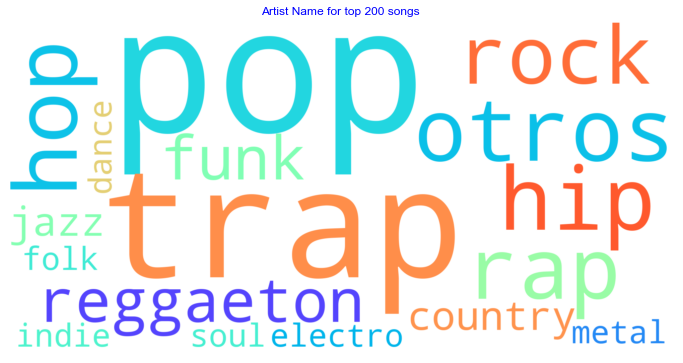

In [25]:
plt.style.use('seaborn')
wrds1 = spotify_dataset["Genre"].str.split("(").str[0].value_counts().keys()

wc1 = WordCloud(scale=5,max_words=1000,colormap="rainbow",background_color="white").generate(" ".join(wrds1))
plt.figure(figsize=(12,18))
plt.imshow(wc1,interpolation="bilinear")
plt.axis("off")
plt.title("Artist Name for top 200 songs ",color='b')
plt.show()

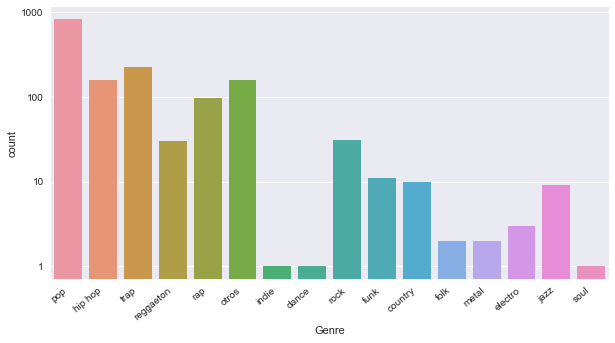

In [26]:
plt.figure(figsize=(10,5))
from matplotlib.ticker import ScalarFormatter

plt.yscale('log')
plt.gca().yaxis.set_major_formatter(ScalarFormatter())
ax = sns.countplot(data = spotify_dataset, x = "Genre")
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha="right")


plt.show()

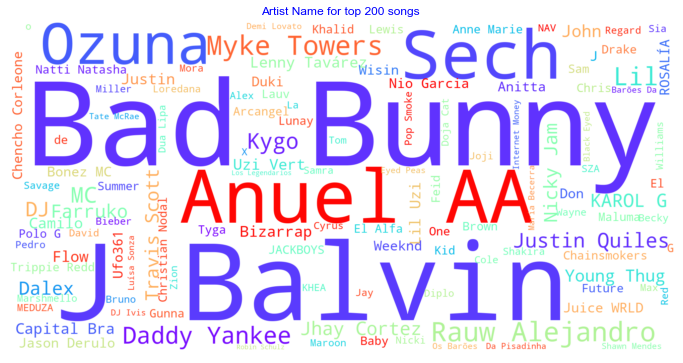

In [27]:
plt.style.use('seaborn')
wrds1 = spotify_dataset["Artist"].str.split("(").str[0].value_counts().keys()

wc1 = WordCloud(scale=5,max_words=1000,colormap="rainbow",background_color="white").generate(" ".join(wrds1))
plt.figure(figsize=(12,18))
plt.imshow(wc1,interpolation="bilinear")
plt.axis("off")
plt.title("Artist Name for top 200 songs ",color='b')
plt.show()

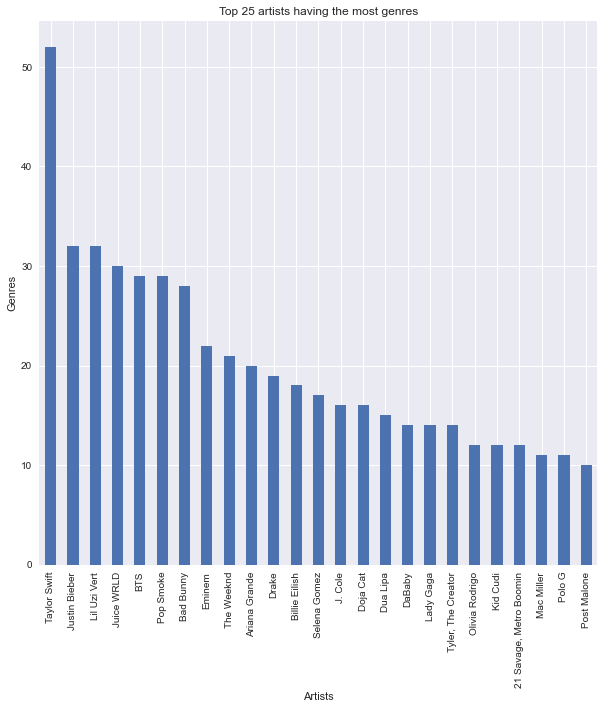

In [28]:
fig = plt.figure(figsize=(10, 10))
ax = fig.subplots()
ax.set_title("Top 25 artists having the most genres")
ax.set_ylabel("Genres")
ax.set_xlabel("Artists")
spotify_dataset["Artist"].value_counts()[:25].plot(ax=ax, kind="bar")
plt.show()

In [29]:
spotify_dataset = spotify_dataset.drop(['Duration_ms'], axis=1)

In [30]:
spotify_dataset = spotify_dataset.round(2) 

,Index,Highest_Charting_Position,Number_of_Times_Charted,Streams,Artist_Followers,Popularity,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Valence,Duration_s
Index,1.000000,0.254341,-0.359693,-0.260033,0.090619,-0.332702,0.126259,-0.018082,-0.014271,0.108972,-0.063596,0.028771,0.023552,-0.054457,-0.023409
Highest_Charting_Position,0.254341,1.000000,-0.417968,-0.295801,-0.232834,-0.163543,0.016385,0.063179,0.032014,0.041685,-0.012759,0.013363,0.026135,0.044904,-0.033826
Number_of_Times_Charted,-0.359693,-0.417968,1.000000,-0.061631,0.027410,0.232385,0.026828,-0.061424,0.031223,-0.060053,0.046319,-0.058547,-0.048223,0.021511,0.033920
Streams,-0.260033,-0.295801,-0.061631,1.000000,0.103066,0.122963,-0.080779,0.003791,-0.031037,-0.062258,0.034437,0.041484,0.053369,0.038438,0.015935
Artist_Followers,0.090619,-0.232834,0.027410,0.103066,1.000000,0.104358,-0.097226,-0.066251,-0.033252,-0.071941,0.024095,-0.013743,-0.019882,-0.108549,0.142145
Popularity,-0.332702,-0.163543,0.232385,0.122963,0.104358,1.000000,0.028643,0.094524,0.158766,-0.032369,-0.090469,-0.030494,-0.024953,-0.000840,0.082092
Danceability,0.126259,0.016385,0.026828,-0.080779,-0.097226,0.028643,1.000000,0.143075,0.235263,0.237192,-0.317107,-0.116558,-0.040445,0.362560,-0.101100
Energy,-0.018082,0.063179,-0.061424,0.003791,-0.066251,0.094524,0.143075,1.000000,0.733051,0.024947,-0.542415,0.123402,0.113943,0.355952,0.056228
Loudness,-0.014271,0.032014,0.031223,-0.031037,-0.033252,0.158766,0.235263,0.733051,1.000000,-0.018585,-0.477173,0.042059,0.104306,0.298392,0.075274
Speechiness,0.108972,0.041685,-0.060053,-0.062258,-0.071941,-0.032369,0.237192,0.024947,-0.018585,1.000000,-0.131859,0.072168,0.111408,0.037949,-0.089898


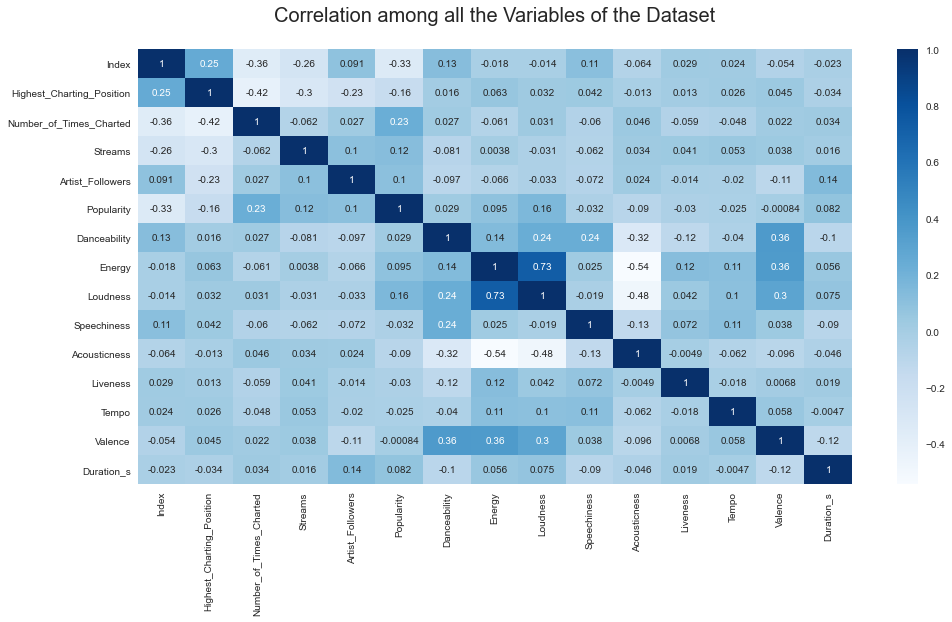

In [31]:
#Checking relationship between variables
#Heatmap
cor=spotify_dataset.corr()
plt.figure(figsize=(16,8), facecolor='w')
sns.heatmap(cor,xticklabels=cor.columns,yticklabels=cor.columns,annot=True, cmap="Blues")
plt.title("Correlation among all the Variables of the Dataset\n", size=20)
cor

In [32]:
#Creamos variables dummies a partir de Genre
dummies_genre = pd.get_dummies(spotify_dataset.loc[:,'Genre'])
spotify_dataset = pd.concat([spotify_dataset, dummies_genre], axis=1)
spotify_dataset.head()

,Index,Highest_Charting_Position,Number_of_Times_Charted,Week_of_Highest_Charting,Song Name,Streams,Artist,Artist_Followers,Song ID,Genre,...,indie,jazz,metal,otros,pop,rap,reggaeton,rock,soul,trap
0,1,1,8,2021-07-23--2021-07-30,Beggin',48633449.0,Måneskin,3377762.0,3Wrjm47oTz2sjIgck11l5e,pop,...,0,0,0,0,1,0,0,0,0,0
1,2,2,3,2021-07-23--2021-07-30,STAY (with Justin Bieber),47248719.0,The Kid LAROI,2230022.0,5HCyWlXZPP0y6Gqq8TgA20,hip hop,...,0,0,0,0,0,0,0,0,0,0
2,3,1,11,2021-06-25--2021-07-02,good 4 u,40162559.0,Olivia Rodrigo,6266514.0,4ZtFanR9U6ndgddUvNcjcG,pop,...,0,0,0,0,1,0,0,0,0,0
3,4,3,5,2021-07-02--2021-07-09,Bad Habits,37799456.0,Ed Sheeran,83293380.0,6PQ88X9TkUIAUIZJHW2upE,pop,...,0,0,0,0,1,0,0,0,0,0
4,5,5,1,2021-07-23--2021-07-30,INDUSTRY BABY (feat. Jack Harlow),33948454.0,Lil Nas X,5473565.0,27NovPIUIRrOZoCHxABJwK,pop,...,0,0,0,0,1,0,0,0,0,0


In [33]:
spotify_dataset.head()

,Index,Highest_Charting_Position,Number_of_Times_Charted,Week_of_Highest_Charting,Song Name,Streams,Artist,Artist_Followers,Song ID,Genre,...,indie,jazz,metal,otros,pop,rap,reggaeton,rock,soul,trap
0,1,1,8,2021-07-23--2021-07-30,Beggin',48633449.0,Måneskin,3377762.0,3Wrjm47oTz2sjIgck11l5e,pop,...,0,0,0,0,1,0,0,0,0,0
1,2,2,3,2021-07-23--2021-07-30,STAY (with Justin Bieber),47248719.0,The Kid LAROI,2230022.0,5HCyWlXZPP0y6Gqq8TgA20,hip hop,...,0,0,0,0,0,0,0,0,0,0
2,3,1,11,2021-06-25--2021-07-02,good 4 u,40162559.0,Olivia Rodrigo,6266514.0,4ZtFanR9U6ndgddUvNcjcG,pop,...,0,0,0,0,1,0,0,0,0,0
3,4,3,5,2021-07-02--2021-07-09,Bad Habits,37799456.0,Ed Sheeran,83293380.0,6PQ88X9TkUIAUIZJHW2upE,pop,...,0,0,0,0,1,0,0,0,0,0
4,5,5,1,2021-07-23--2021-07-30,INDUSTRY BABY (feat. Jack Harlow),33948454.0,Lil Nas X,5473565.0,27NovPIUIRrOZoCHxABJwK,pop,...,0,0,0,0,1,0,0,0,0,0


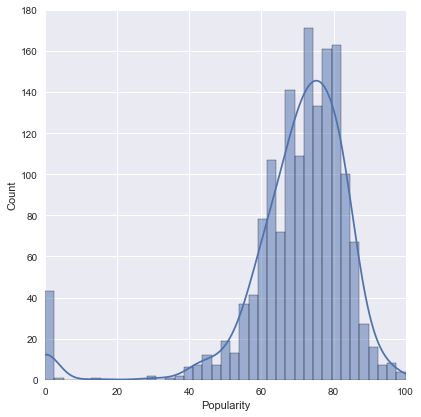

In [34]:
#Observamos que la mayor parte de los artistas de nuestro ranking son populares. 
Popularity_displot = sns.displot(spotify_dataset, x='Popularity', kde=True)
Popularity_displot.set(xlim=(0,100))
Popularity_displot.set(ylim=(0, 180))
Popularity_displot.fig.set_figwidth(6)
Popularity_displot.fig.set_figheight(6)

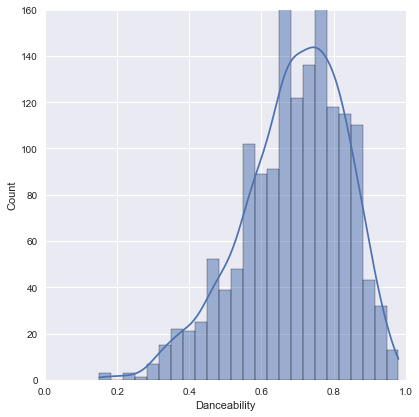

In [35]:
#Observamos que la mayor parte de las canciones son altamente bailables.
Danceability_displot = sns.displot(spotify_dataset, x='Danceability', kde=True)
Danceability_displot.set(xlim=(0,1))
Danceability_displot.set(ylim=(0, 160))
Danceability_displot.fig.set_figwidth(6)
Danceability_displot.fig.set_figheight(6)

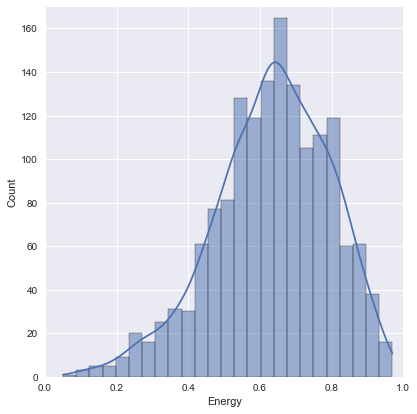

In [36]:
#Observamos que la mayor parte de las canciones son enérgicas.
Energy_displot = sns.displot(spotify_dataset, x='Energy', kde=True)
Energy_displot.set(xlim=(0,1))
Energy_displot.set(ylim=(0, 170))
Energy_displot.fig.set_figwidth(6)
Energy_displot.fig.set_figheight(6)

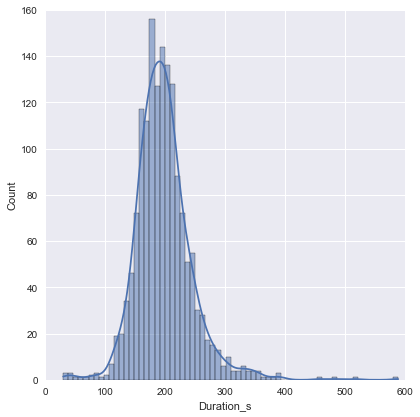

In [37]:
#Observamos que la mayor parte de las canciones tienen una duración similar.
Duration_displot = sns.displot(spotify_dataset, x='Duration_s', kde=True)
Duration_displot.set(xlim=(0,600))
Duration_displot.set(ylim=(0, 160))
Duration_displot.fig.set_figwidth(6)
Duration_displot.fig.set_figheight(6)

In [41]:
#spotify_dataset.isnull().sum()

In [42]:
#spotify_dataset.dropna(axis="index",subset=['Popularity'],how='any',inplace=True)

## Hipótesis

* ¿Hay alguna relación entre la variable objetivo y todas las variables explicativas?

* Nuestra variable OBJETIVO es la cantidad de streams 

#### Estandarizamos nuestras features

In [43]:
dummies_genre.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1556 entries, 0 to 1555
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   country    1556 non-null   uint8
 1   dance      1556 non-null   uint8
 2   electro    1556 non-null   uint8
 3   folk       1556 non-null   uint8
 4   funk       1556 non-null   uint8
 5   hip hop    1556 non-null   uint8
 6   indie      1556 non-null   uint8
 7   jazz       1556 non-null   uint8
 8   metal      1556 non-null   uint8
 9   otros      1556 non-null   uint8
 10  pop        1556 non-null   uint8
 11  rap        1556 non-null   uint8
 12  reggaeton  1556 non-null   uint8
 13  rock       1556 non-null   uint8
 14  soul       1556 non-null   uint8
 15  trap       1556 non-null   uint8
dtypes: uint8(16)
memory usage: 76.5 KB


In [44]:
#Lo que hicimos fue crear un dataset diferente, esta vez estandarizado. Este DataSet lo nombramos std_spotify

features = ['Artist_Followers','Danceability', 'Streams',
            'Energy','Loudness','Speechiness','Acousticness',
            'Liveness','Tempo','Valence','Duration_s', 'country',
            'dance','electro','folk','funk','hip hop','indie',
            'jazz','metal','otros','pop','rap','reggaeton','rock',
            'soul','trap']

X = spotify_dataset[features]
scaler = MinMaxScaler()
scaler.fit(X)
std_features = scaler.transform(X)
std_spotify = pd.DataFrame(std_features)
std_spotify.columns = [i + '_std' for i in features]
std_spotify

,Artist_Followers_std,Danceability_std,Streams_std,Energy_std,Loudness_std,Speechiness_std,Acousticness_std,Liveness_std,Tempo_std,Valence_std,...,indie_std,jazz_std,metal_std,otros_std,pop_std,rap_std,reggaeton_std,rock_std,soul_std,trap_std
0,0.040475,0.674699,1.000000,0.815217,0.763118,0.034884,0.131313,0.361702,0.550489,0.589474,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.026702,0.530120,0.968853,0.771739,0.738006,0.034884,0.040404,0.085106,0.777105,0.473684,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.075140,0.493976,0.809460,0.663043,0.754498,0.151163,0.343434,0.063830,0.758184,0.694737,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.999467,0.795181,0.756306,0.923913,0.804348,0.011628,0.050505,0.361702,0.500221,0.589474,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.065625,0.710843,0.669684,0.706522,0.665667,0.046512,0.020202,0.031915,0.651403,0.905263,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1551,0.325955,0.734940,0.010225,0.706522,0.717766,0.058140,0.000000,0.138298,0.437401,0.610526,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1552,0.180172,0.457831,0.010053,0.891304,0.826462,0.081395,0.242424,0.329787,0.666351,0.715789,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1553,0.272328,0.734940,0.010005,0.510870,0.781109,0.011628,0.181818,0.117021,0.367518,0.378947,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1554,0.002445,0.819277,0.009701,0.543478,0.679910,0.046512,0.252525,0.170213,0.677010,0.894737,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Definimos nuestra variable Target : Streams

In [45]:
#Variable Target
y = spotify_dataset.Popularity

#### Separamos el conjunto en Train y Test

In [46]:
#Para el conjunto de test utilizamos el %30 de nuestros datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 117)

#### Ajustemos una regresión lineal múltiple con los datos del conjunto de entrenamiento usando statsmodels y evaluemos la significancia de cada uno de los coeficientes

In [47]:
#Aquí es importante revisar los P-Value
X_train_sm = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train_sm, missing='drop').fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Popularity   R-squared:                       0.229
Model:                            OLS   Adj. R-squared:                  0.211
Method:                 Least Squares   F-statistic:                     12.65
Date:                Sun, 23 Jan 2022   Prob (F-statistic):           6.56e-45
Time:                        18:41:18   Log-Likelihood:                -4399.8
No. Observations:                1089   AIC:                             8852.
Df Residuals:                    1063   BIC:                             8981.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               77.0999      5.946     12.967      0.000      65.433      88.767
Artist_Followers -1.314e-08   2.67e-08     -0.492      0.623   -6.55e-08    3.92e-08
Danceability        -1.6388      3.777     -0.434      0.664      -9.050       5.772
Streams           6.048e-07   1.23e-07      4.935      0.000    3.64e-07    8.45e-07
Energy              -9.1188      4.433     -2.057      0.040     -17.817      -0.420
Loudness             1.2414      0.264      4.706      0.000       0.724       1.759
Speechiness         -0.0404      4.265     -0.009      0.992      -8.409       8.329
Acousticness        -0.6911      2.270     -0.304      0.761      -5.145       3.762
Liveness            -3.8991      3.059     -1.275      0.203      -9.901       2.102
Tempo               -0.0249      0.015     -1.678      0.094      -0.054       0.004
Valence              2.1230      2.340      0.907      0.364      -2.469       6.715
Duration_s           0.0168      0.010      1.694      0.091      -0.003       0.036
country              7.4614      5.719      1.305      0.192      -3.760      18.683
dance               20.7823     13.193      1.575      0.115      -5.104      46.669
electro              8.9658     13.220      0.678      0.498     -16.975      34.907
folk                 0.9240      9.512      0.097      0.923     -17.741      19.589
funk                -1.3365      4.839     -0.276      0.782     -10.832       8.158
hip hop              2.5191      2.448      1.029      0.304      -2.285       7.324
indie               29.0460     13.393      2.169      0.030       2.766      55.326
jazz               -13.4629      5.472     -2.461      0.014     -24.199      -2.727
metal                5.0920     13.221      0.385      0.700     -20.851      31.035
otros              -14.0787      2.341     -6.014      0.000     -18.673      -9.485
pop                  6.1745      2.093      2.950      0.003       2.068      10.281
rap                 10.5505      2.558      4.125      0.000       5.531      15.570
reggaeton            7.9254      3.744      2.117      0.035       0.578      15.273
rock                 1.5122      3.786      0.399      0.690      -5.917       8.942
soul                      0          0        nan        nan           0           0
trap                 5.0249      2.355      2.134      0.033       0.405       9.645
==============================================================================
Omnibus:                      293.064   Durbin-Watson:                   1.971
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              952.458
Skew:                          -1.305   Prob(JB):                    1.50e-207
Kurtosis:                       6.765   Cond. No.                     1.42e+16
=====================================================

In [48]:
no_reg_model_params = model.params

In [49]:
#Calculamos el error cuadrático medio en Train y Test con la finalidad de observar sus diferencias
sm_prediction_train = model.predict(X_train_sm)
print(eval_measures.rmse(y_train, sm_prediction_train))

X_test_sm = sm.add_constant(X_test)
sm_prediction_test = model.predict(X_test_sm)
print(eval_measures.rmse(y_test, sm_prediction_test))

13.753814297027882
13.991944247329862


## RMSE
* La métrica más comúnmente utilizada para las tareas de regresión es el error cuadrático medio y representa a la raíz cuadrada de la distancia cuadrada promedio entre el valor real y el valor pronosticado. Indica el ajuste absoluto del modelo a los datos, cuán cerca están los puntos de datos observados de los valores predichos del modelo. El error cuadratico medio o RMSE es una medida absoluta de ajuste.

In [50]:
regressor = LinearRegression()

In [51]:
regressor.fit(X_train,y_train)

LinearRegression()

In [52]:
y_train_pred = regressor.predict(X_train)
y_test_pred = regressor.predict(X_test)

In [53]:
MAE_train=mean_absolute_error(y_train,y_train_pred)
MAE_test=mean_absolute_error(y_test,y_test_pred)

RMSE_train=np.sqrt(mean_squared_error(y_train,y_train_pred))
RMSE_test=np.sqrt(mean_squared_error(y_test,y_test_pred))

r2_train= metrics.r2_score(y_train,y_train_pred)
r2_test= metrics.r2_score(y_test,y_test_pred)

adj_r2_train = 1 - ((1 - r2_train) * (len(y_train) - 1)) / (len(y_train) - X_train.shape[1] - 1)
adj_r2_test = 1 - ((1 - r2_test) * (len(y_test) - 1)) / (len(y_test) - X_test.shape[1] - 1)
    

print("El MAE en train es:",MAE_train)
print("El MAE en test es:",MAE_test)
print("-------------------------------------------")
print("El RMSE en train es:",RMSE_train)
print("El RMSE en test es:",RMSE_test)
print("-------------------------------------------")
print("El r2 de train es:",r2_train)
print("El r2 de test es:",r2_test)
print("-------------------------------------------")
print("El r2 ajustado de train es:",adj_r2_train)
print("El r2 ajustado de test es:",adj_r2_test)

El MAE en train es: 9.693807456075183
El MAE en test es: 9.740534860521704
-------------------------------------------
El RMSE en train es: 13.753814297027882
El RMSE en test es: 14.00817825307803
-------------------------------------------
El r2 de train es: 0.22931909324573718
El r2 de test es: 0.23197015139957922
-------------------------------------------
El r2 ajustado de train es: 0.209707043780737
El r2 ajustado de test es: 0.1847336914628791


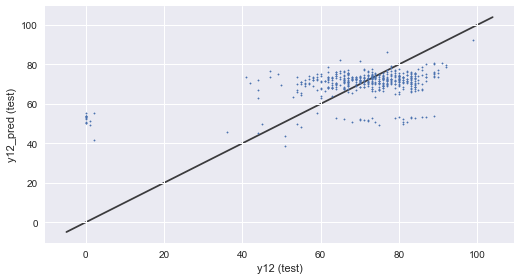

In [54]:
    plt.figure(figsize = (14,4))
   
    ax = plt.subplot(1,2,2)
    ax.scatter(y_test,y_test_pred, s =2)
    
    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
    ]
    
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('y12 (test)')
    plt.ylabel('y12_pred (test)')
    
    plt.tight_layout()
    plt.show()

## Regularización de Lasso

* Ajustamos el modelo aplicando regularización de Lasso y validación cruzada para estimar el mejor valor de 𝛼

In [55]:
#Buscamos el Alfa que minimice el error cuadrático medio
lm_lasso = linear_model.LassoCV(alphas=[0.00001, 0.00005, 0.0001, 0.0005, 0.001, 0.005, 0.01,\
                                        0.05, 0.1, 1, 5, 10],\
                                        normalize = False, cv = 5) 

model_l = lm_lasso.fit(X_train, y_train)

model_l.score(X_train, y_train)

C:\ProgramData\Anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15004.453005483752, tolerance: 19.87052256817451
  model = cd_fast.enet_coordinate_descent_gram(
C:\ProgramData\Anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 78164.85226672301, tolerance: 19.87052256817451
  model = cd_fast.enet_coordinate_descent_gram(
C:\ProgramData\Anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 76998.49156600406, tolerance: 19.87052256817451
  model = cd_fast.enet_coordinate_descent_gram(
C:\ProgramData\Anaconda3\envs\dhdsbl

0.21027040977549882

In [56]:
model_l.coef_

array([ 5.72221485e-09,  0.00000000e+00,  5.82534766e-07, -0.00000000e+00,
        9.94826321e-01,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
       -2.22243882e-02, -0.00000000e+00,  1.54581338e-02,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -9.65324037e-01,  0.00000000e+00, -4.89457315e-01, -0.00000000e+00,
       -1.73360248e+01,  1.67540020e+00,  4.70757727e+00,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00])

In [57]:
model_l.intercept_

72.99476310420307

In [58]:
model_l.alpha_

0.1

* Probamos con muchísimos Alpha y ninguno mejoró la performance.

## Ridge

In [59]:
lm_ridge = linear_model.RidgeCV(alphas=[0.00001, 0.00005, 0.0001, 0.0005, 0.001, 0.005, 0.01,\
                                        0.05, 0.1, 1, 5, 10],\
                                        normalize=True, cv=3) 


model_r = lm_ridge.fit(X_train, y_train)

print('Score model_r:', model_r.score(X_test, y_test))


Score model_r: 0.18245975992130703


In [60]:
model_r.coef_

array([ 1.82292489e-08,  9.52374267e-01,  2.96201058e-07,  2.39722450e-01,
        4.01695863e-01, -1.29351380e+00, -1.24352999e+00, -1.85278750e+00,
       -8.23742327e-03,  2.12929203e-01,  1.03505203e-02,  2.49598497e+00,
        8.98999016e+00,  3.51173570e+00, -2.07110216e+00, -1.47676899e+00,
       -4.99316171e-01,  1.04638865e+01, -8.70143075e+00,  8.09994579e-01,
       -8.94713353e+00,  2.20687581e+00,  3.49428677e+00,  2.92735695e+00,
       -1.10890685e+00,  0.00000000e+00,  1.00251070e+00])

In [61]:
model_r.intercept_

68.77560429849754

In [62]:
lm_ridge.alpha_

1.0

In [63]:
spotify_dataset2 = pd.DataFrame(spotify_dataset)

#### GradientBoostingRegressor
#### RandomForestRegressor
#### XGBRegressor


In [64]:

features2 = ['Artist_Followers','Danceability', 'Streams',
            'Energy','Loudness','Speechiness','Acousticness',
            'Liveness','Tempo','Valence','Duration_s', 'country',
            'dance','electro','folk','funk','hip hop','indie',
            'jazz','metal','otros','pop','rap','reggaeton','rock',
            'soul','trap']

y1 = spotify_dataset2['Popularity']
X1 = spotify_dataset2[features2]

scaler.fit(X1)
std_features2 = scaler.transform(X1)
std_spotify2 = pd.DataFrame(std_features2)
std_spotify2.columns = [i + '_std' for i in features2]
std_spotify2

,Artist_Followers_std,Danceability_std,Streams_std,Energy_std,Loudness_std,Speechiness_std,Acousticness_std,Liveness_std,Tempo_std,Valence_std,...,indie_std,jazz_std,metal_std,otros_std,pop_std,rap_std,reggaeton_std,rock_std,soul_std,trap_std
0,0.040475,0.674699,1.000000,0.815217,0.763118,0.034884,0.131313,0.361702,0.550489,0.589474,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.026702,0.530120,0.968853,0.771739,0.738006,0.034884,0.040404,0.085106,0.777105,0.473684,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.075140,0.493976,0.809460,0.663043,0.754498,0.151163,0.343434,0.063830,0.758184,0.694737,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.999467,0.795181,0.756306,0.923913,0.804348,0.011628,0.050505,0.361702,0.500221,0.589474,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.065625,0.710843,0.669684,0.706522,0.665667,0.046512,0.020202,0.031915,0.651403,0.905263,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1551,0.325955,0.734940,0.010225,0.706522,0.717766,0.058140,0.000000,0.138298,0.437401,0.610526,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1552,0.180172,0.457831,0.010053,0.891304,0.826462,0.081395,0.242424,0.329787,0.666351,0.715789,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1553,0.272328,0.734940,0.010005,0.510870,0.781109,0.011628,0.181818,0.117021,0.367518,0.378947,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1554,0.002445,0.819277,0.009701,0.543478,0.679910,0.046512,0.252525,0.170213,0.677010,0.894737,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [80]:
X_train2,X_test2,y_train2,y_test2 = train_test_split(X1,y1,train_size=0.30)
    
gb_reg_model = GradientBoostingRegressor(random_state = 42)
rf_reg_model = RandomForestRegressor(random_state = 42)
xgb_reg_model = XGBRegressor(random_state = 42)

scores = {}

def get_model_scores(model,modelstr):  
    model.fit(X_train2,y_train2)
    predicted = model.predict(X_test2)
    
    print("\n ",modelstr," ------------")
    print("\n R2 Score: ",r2_score(y_test2, predicted))
    print('\n MAE:{}'.format(mean_absolute_error(y_test2,predicted)))
    print('\n MSE:{}'.format(mean_squared_error(y_test2,predicted)))
    print('\n RMSE:{}'.format(np.sqrt(mean_squared_error(y_test2,predicted))))
    
    scores.update({modelstr : (r2_score(y_test2, predicted) * 100) })

In [84]:
get_model_scores(gb_reg_model,"GradientBoostingRegressor")
get_model_scores(rf_reg_model,"RandomForestRegressor")
get_model_scores(xgb_reg_model,"XGBRegressor")


  GradientBoostingRegressor  ------------

 R2 Score:  0.5246855645316848

 MAE:8.017572720405873

 MSE:109.98893836080495

 RMSE:10.487561125485989

  RandomForestRegressor  ------------

 R2 Score:  0.5191032244196525

 MAE:8.082290733944953

 MSE:111.28070569769724

 RMSE:10.548967044108975

  XGBRegressor  ------------

 R2 Score:  0.4213811407339877

 MAE:8.475249585215105

 MSE:133.89383805165562

 RMSE:11.571250496452647


C:\ProgramData\Anaconda3\envs\dhdsblend2021\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
